 Example 3 - Isotropic Bearings, asymmetrical rotor. 
===========

In this example, we use the rotor seen in Example 5.9.1 from 'Dynamics of Rotating Machinery' by MI Friswell, JET Penny, SD Garvey & AW Lees, published by Cambridge University Press, 2010.
A 1.5-m-long shaft, with a diameter of $0.05 m$. The disks are keyed to the shaft at $0.5$ and $1 m$ from
one end. The left disk is $0.07 m$ thick with a diameter of $0.28 m$; the right disk
is $0.07 m$ thick with a diameter of $0.35 m$. For the shaft, $E = 211 GN/m^2$ and
$G = 81.2 GN/m^2$. There is no internal shaft damping. For both the shaft and the
disks, $\rho = 7,810 kg/m^3$. The shaft is supported by identical bearings at its ends.

These bearings are isotropic and have a stiffness of $1 MN/m$ in both the x and
y directions. The bearings contribute no additional stiffness to the rotational
degrees of freedom and there is no damping or cross-coupling in the bearings.


In [1]:
from bokeh.io import output_notebook
import ross as rs
import numpy as np
output_notebook()

Loading BokehJS ...

(Figure(id='1003', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f0a2909b0>)

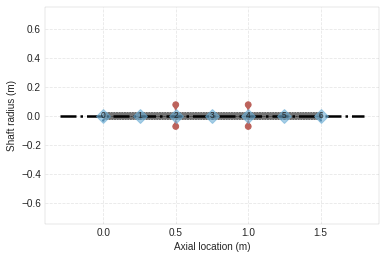

In [2]:
#Classic Instantiation of the rotor
shaft_elements = []
bearing_seal_elements = []
disk_elements = []
Steel = rs.Material.use_material('Steel')
for i in range(6):
    shaft_elements.append(rs.ShaftElement(L=0.25, material=Steel, n=i, i_d=0, o_d=0.05))
    
disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=4,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, cxx=0, cyy=0))
bearing_seal_elements.append(rs.BearingElement(n=6, kxx=1e6, kyy=1e6, cxx=0, cyy=0))

rotor591c = rs.Rotor(shaft_elements=shaft_elements,
                     bearing_seal_elements=bearing_seal_elements,
                     disk_elements=disk_elements,n_eigen = 12)

rotor591c.plot_rotor()

(Figure(id='1858', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9eedaa7240>)

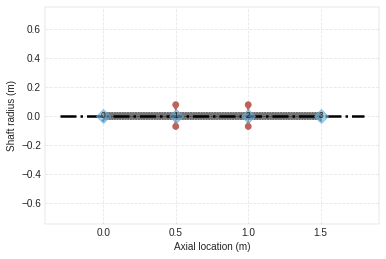

In [3]:
#From_section class method instantiation.
bearing_seal_elements = []
disk_elements = []
shaft_length_data = 3*[0.5]
i_d = 3*[0]
o_d = 3*[0.05]

disk_elements.append(rs.DiskElement.from_geometry(n=1,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, cxx=0, cyy=0))
bearing_seal_elements.append(rs.BearingElement(n=3, kxx=1e6, kyy=1e6, cxx=0, cyy=0))

rotor591fs = rs.Rotor.from_section(brg_seal_data=bearing_seal_elements,
                                   disk_data=disk_elements,leng_data=shaft_length_data,
                                   i_ds_data=i_d,o_ds_data=o_d
                                  )
rotor591fs.plot_rotor()


Normal Instantiation = [ 86.65811435  86.65811435 274.31285391 274.31285391 716.78631221
 716.78631221]


From Section Instantiation = [ 86.65926451  86.65926451 274.37573752 274.37573752 718.87267817
 718.87267818]


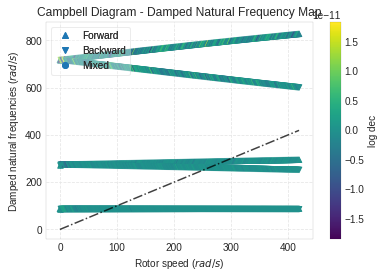

In [4]:
#Obtaining results (wn is in rad/s)
rotor591c.run_campbell(np.linspace(0,4000*np.pi/30,250)).plot()

print('Normal Instantiation =', rotor591c.wn)
print('\n')
print('From Section Instantiation =', rotor591fs.wn)

In [5]:
#Obtaining modal results for w=4000RPM (wn is in rad/s)
rotor591c.w = 4000*np.pi/30
rotor591c.run_modal()

print('Normal Instantiation =', rotor591c.wn)

Normal Instantiation = [ 85.389467    87.7958637  251.78460413 294.71333087 600.17936195
 827.07536193]
